In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf 
from tensorflow.keras import layers, models, optimizers, Input, Model
from tensorflow.keras.utils import to_categorical

(400,)


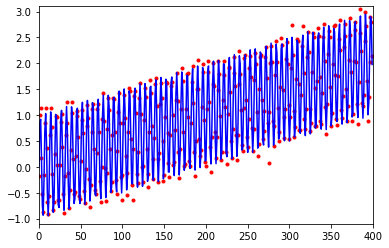

In [2]:
#DATA SET
data_time = np.sin(np.arange(400))+ np.random.normal(0, 0.1, 400) + np.arange(400)/200 
print(data_time.shape)
plt.plot(data_time,'r.')
plt.plot(range(400), np.sin(np.arange(400))+np.arange(400)/200, 'b')
plt.xlim(-0.5, 400.5)
plt.ylim(-1.1, 3.1)
plt.show()

In [3]:
batch_size = 10
sequence_length = 4
data_dim = 3

In [4]:
#DATA_MATRIX
data_matrix = []
seq_len = 3
for i in range(0, len(data_time)-data_dim*sequence_length):
    tmp_data = data_time[i:i+data_dim*sequence_length+1]
    data_matrix.append(tmp_data)
    
data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(388, 13)
[[-0.18505665  0.99913495  1.13129113 ... -0.67229262 -0.91851311
  -0.57090823]
 [ 0.99913495  1.13129113  0.16282435 ... -0.91851311 -0.57090823
   0.61661139]
 [ 1.13129113  0.16282435 -0.52422831 ... -0.57090823  0.61661139
   1.12881753]
 ...
 [ 3.04613439  2.24274859  1.22778896 ...  1.3509192   2.02863612
   2.89023099]
 [ 2.24274859  1.22778896  1.17731678 ...  2.02863612  2.89023099
   2.80603449]
 [ 1.22778896  1.17731678  1.39314621 ...  2.89023099  2.80603449
   2.14255814]]


In [5]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:12]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1,12]
print(datax.shape)
print(datay.shape)

(387, 12)
(387,)


In [6]:
datax = np.reshape(datax, (-1, sequence_length, data_dim))
print(datax.shape)
print(datay.shape)

(387, 4, 3)
(387,)


In [7]:
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0], :]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 4, 3)
(87, 4, 3)
(300,)
(87,)


In [8]:
input_shape = (trnx[0].shape)
input_tensor = layers.Input(input_shape)

In [9]:
rnn_layer = layers.LSTM(10)(input_tensor)
output_tensor = layers.Dense(1, activation = "ReLU")(rnn_layer)

2022-05-12 21:48:28.220685: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 21:48:28.247206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 21:48:28.247369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 21:48:28.247934: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
model_mtoo = models.Model(input_tensor, output_tensor)
model_mtoo.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [11]:
model_mtoo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 10)                560       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model_mtoo.fit(trnx, trny, validation_data = [tstx, tsty], batch_size = 10, epochs = 300)

Epoch 1/300
 1/30 [>.............................] - ETA: 52s - loss: 0.4240 - mean_squared_error: 0.4240

2022-05-12 21:48:30.659804: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2022-05-12 21:48:30.730034: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30/30 [==============================] - 2s 8ms/step - loss: 0.7518 - mean_squared_error: 0.7518 - val_loss: 1.4410 - val_mean_squared_error: 1.4410
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5680 - mean_squared_error: 0.5680 - val_loss: 0.9411 - val_mean_squared_error: 0.9411
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5289 - mean_squared_error: 0.5289 - val_loss: 0.7810 - val_mean_squared_error: 0.7810
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4948 - mean_squared_error: 0.4948 - val_loss: 0.7893 - val_mean_squared_error: 0.7893
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4530 - mean_squared_error: 0.4530 - val_loss: 0.6659 - val_mean_squared_error: 0.6659
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 0.3893 - mean_squared_error: 0.3893 - val_loss: 0.5785 - val_mean_squared_error: 0.5785
Epoch 7/300
30/30 [===========================

Epoch 52/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.0555 - val_mean_squared_error: 0.0555
Epoch 53/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 54/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.0639 - val_mean_squared_error: 0.0639
Epoch 55/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 56/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 57/300
30/30 [==============================] - 0s 5ms/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.0571 - val_mean_squared_error: 0.0571
Epoch 58/300
30/30 [========

30/30 [==============================] - 0s 3ms/step - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 103/300
30/30 [==============================] - 0s 5ms/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 104/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 105/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 106/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 107/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 108/300
30/30 [===============

30/30 [==============================] - 0s 3ms/step - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 153/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 154/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 155/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 156/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 157/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 158/300
30/30 [===============

30/30 [==============================] - 0s 3ms/step - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 203/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 204/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 205/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 206/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 207/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 208/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 253/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 254/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 255/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 256/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 257/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 258/300
30/30 [===============

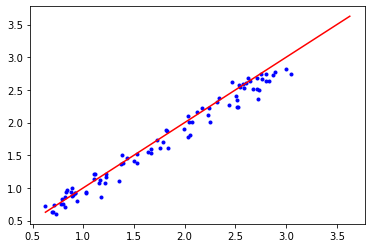

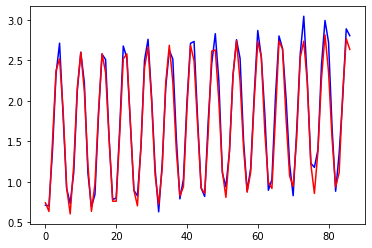

Final validation error is: 0.017138


In [13]:
plt.plot(tsty, model_mtoo.predict(tstx), 'b.')
plt.plot(np.arange(min(tsty),max(tsty)+1),np.arange(min(tsty),max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]), tsty,'b-')
plt.plot(range(tsty.shape[0]), model_mtoo.predict(tstx),'r-')
plt.show()
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1])